In [ ]:
!ls "/content/drive/MyDrive/Deep Learning for Computer Vision"

 C1-IntroToDeepLearning   C2-ObjectDetection   C3-AdvancedTechniques   Data  'Trained Models'


In [ ]:
!pip install tensorflow # Install tensorflow for image processing
from tensorflow.keras.preprocessing import image_dataset_from_directory # Import for creating dataset
import tensorflow as tf # Import the tensorflow library

filename = "/content/drive/MyDrive/Deep Learning for Computer Vision"

# Create an image dataset using tensorflow's image_dataset_from_directory
imdsFasteners = image_dataset_from_directory(
    filename,
    labels='inferred', # Infer labels from subfolder names
    label_mode='int', # Use integer labels
    image_size=(224, 224), # Resize images (adjust as needed)
    interpolation='nearest',
    batch_size=32, # Adjust batch size as needed
    shuffle=True # Shuffle the dataset
)

Found 8305 files belonging to 5 classes.


Prepare Your Data for Classification

In [ ]:
import tensorflow as tf # Import tensorflow if not already imported

numImgs = tf.data.experimental.cardinality(imdsFasteners).numpy()
# Use tf.data.experimental.cardinality to get the dataset size,
# and then .numpy() to convert it to a regular Python integer.

In [ ]:
import tensorflow as tf # Import tensorflow if not already imported
import numpy as np # Import numpy to work with arrays

def countEachLabel(dataset):
  """
  This function counts the instances of each label in a TensorFlow dataset.

  Args:
    dataset: A TensorFlow dataset.

  Returns:
    A dictionary where keys are labels and values are counts.
  """

  label_counts = {} # Initialize a dictionary to store counts
  for images, labels in dataset: # Iterate through batches of the dataset
    for label in labels.numpy(): # Iterate through labels in the batch
      label_counts[label] = label_counts.get(label, 0) + 1
      # Increment the count for the label.
      # If label is not found in the dictionary, .get(label,0)
      # ensures it's initialized to 0 before incrementing.
  return label_counts # Return the dictionary of label counts

# Now you can call the function to count labels in your dataset
label_counts = countEachLabel(imdsFasteners)
print(label_counts)


{3: 8305}


In [ ]:
countEachLabel(imdsFasteners)

{3: 8305}

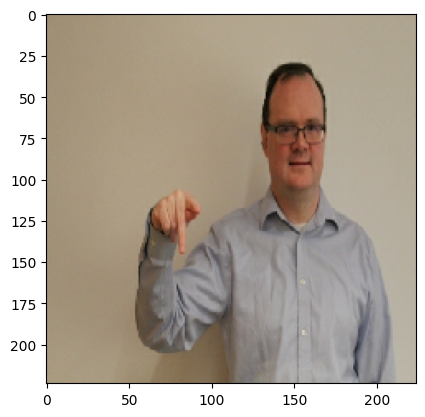

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for image display
import tensorflow as tf # Import tensorflow if not already imported

# Iterate through the dataset and display the first image
for images, labels in imdsFasteners.take(1):
    # Take(1) retrieves only one batch from the dataset
    image = images[0].numpy() # Get the first image from the batch
    # Convert the tensor to a NumPy array for display
    plt.imshow(image.astype('uint8')) # Display the image
    plt.show() # Show the plot

In [ ]:
import numpy as np

# ... your previous code ...

# Instead of size(img), use:
np.shape(image)  # Assuming 'image' is the NumPy array holding your image data
print(image.shape)

(224, 224, 3)


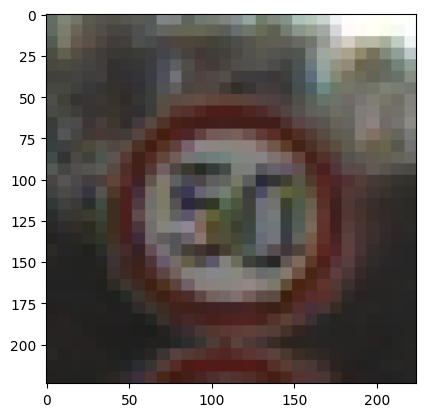

In [ ]:
def readimage(dataset, index):
    """
    Reads an image from a TensorFlow dataset at a given index.

    Args:
        dataset: A TensorFlow dataset.
        index: The index of the image to read.

    Returns:
        A NumPy array containing the image data.
    """
    # Get the batch size from the dataset (using a different approach)
    # Assuming the dataset has a 'batch' method and a 'cardinality' property
    if dataset.cardinality().numpy() > 0:  # Check if dataset is not empty
        batch_size = dataset.take(1).get_single_element()[0].shape[0]
    else:
        batch_size = 32  # Default batch size if dataset is empty

    for i, (images, labels) in enumerate(dataset):  # Iterate with index
        if i == index // batch_size: # Correct index for batching
            return images[index % batch_size].numpy()

# Example usage
img = readimage(imdsFasteners, 475)
plt.imshow(img.astype('uint8'))  # Display the image (convert to uint8 if needed)
plt.show()

In [ ]:
import tensorflow as tf

layers = [
    tf.keras.layers.InputLayer(input_shape=(227, 227, 3), name="imageinput"),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", name="conv"),
    tf.keras.layers.ReLU(name="relu"),
    tf.keras.layers.MaxPooling2D((5, 5), padding="same", name="maxpool"),
    tf.keras.layers.Dense(19, name="fc"),
    tf.keras.layers.Softmax(name="softmax"),
    # Note: classificationLayer is usually handled during model compilation in Keras
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator with augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Strategy for filling new pixels
)

# Resize images to 227x227
target_size = (227, 227)

# Create generators for training and validation
# Update 'train_directory' with the correct path to your training images
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Deep Learning for Computer Vision/train',  # Updated path
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

# For validation, typically you don't want augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
# Update 'validation_directory' with the correct path to your validation images
validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Deep Learning for Computer Vision/validation',  # Updated path
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Deep Learning for Computer Vision/train'